##HypoThyroidism Classification
###Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.
###Dataset: https://archive.ics.uci.edu/ml/datasets/thyroid+disease
*Submitted by:
#####Kishan Vyas
#####1st Year MTech AIML
#####PRN: 21070149028

In [13]:
# Import modules
import numpy as np                    # for Linear algebra
import pandas as pd                   # for Data manipulation and Analysis 
import matplotlib.pyplot as plt       # for Data visualization
import seaborn as sns                 # for Data visualization and EDA

import warnings                       # for avoid warnings
warnings.filterwarnings('ignore')

In [14]:
# Import the "hypothyroid.csv" dataset using Pandas
data = pd.read_csv('hypothyroid.csv')
data.head()

,Age,Gender,thyroxine,query on thyroxine,antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,target
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,P


In [15]:
# size of the dataset
data.shape
# here, 3772 samples and 30 attributes

(3772, 30)

In [16]:
# get a concise summary of the data
data.info()
# there are 3772 samples with 30 attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     3772 non-null   object
 1   Gender                  3772 non-null   object
 2   thyroxine               3772 non-null   object
 3   query on thyroxine      3772 non-null   object
 4   antithyroid medication  3772 non-null   object
 5   sick                    3772 non-null   object
 6   pregnant                3772 non-null   object
 7   thyroid surgery         3772 non-null   object
 8   I131 treatment          3772 non-null   object
 9   query hypothyroid       3772 non-null   object
 10  query hyperthyroid      3772 non-null   object
 11  lithium                 3772 non-null   object
 12  goitre                  3772 non-null   object
 13  tumor                   3772 non-null   object
 14  hypopituitary           3772 non-null   object
 15  psyc

In [17]:
# check null-values
data.isna().sum()

Age                       0
Gender                    0
thyroxine                 0
query on thyroxine        0
antithyroid medication    0
sick                      0
pregnant                  0
thyroid surgery           0
I131 treatment            0
query hypothyroid         0
query hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH measured              0
TSH                       0
T3 measured               0
T3                        0
TT4 measured              0
TT4                       0
T4U measured              0
T4U                       0
FTI measured              0
FTI                       0
TBG measured              0
TBG                       0
referral source           0
target                    0
dtype: int64

# **Data Pre-Processing**

In this dataset, many missing values are present but all attributes has "object" data type. So missing values consider as a value, that's why above cell does not define any null values.So now first apply data pre-processing for cleaning the dataset.

In [18]:
# drop unneccesary columns
extra_col = []
for c in data.columns:
    if 'measured' in c or 'query' in c:
        extra_col.append(c)

extra_col.append('TBG')
extra_col.append('referral source')
extra_col.append('psych')
extra_col.append('hypopituitary')
extra_col.append('I131 treatment')

In [19]:
extra_col

['query on thyroxine',
 'query hypothyroid',
 'query hyperthyroid',
 'TSH measured',
 'T3 measured',
 'TT4 measured',
 'T4U measured',
 'FTI measured',
 'TBG measured',
 'TBG',
 'referral source',
 'psych',
 'hypopituitary',
 'I131 treatment']

In [20]:
# drop extra columns
data = data.drop(extra_col, axis=1)
data.shape

(3772, 16)

All missing values as form as '?' so replace it with null values

In [21]:
# Convert '?' to Nan values
anomaly_col = ['Age','Gender', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
for c in anomaly_col:
  data[c] = data[c].replace(['?'], np.nan)

In [22]:
# Convert Age, TSH, T3, TT4, T4U, FTI to numerical(Float)
data[["Age", "TSH", "T3", "TT4", "T4U", "FTI"]] = data[["Age", "TSH", "T3", "TT4", "T4U", "FTI"]].astype(float)

In [23]:
# Convert to categorical variable
data[["Gender","thyroxine","antithyroid medication","sick","pregnant","thyroid surgery","lithium","goitre","tumor"]] = data[[  'Gender', 'thyroxine', 'antithyroid medication', 'sick','pregnant', 'thyroid surgery', 'lithium', 'goitre', 'tumor' ]].astype('category')

In [24]:
# now check again for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     3771 non-null   float64 
 1   Gender                  3622 non-null   category
 2   thyroxine               3772 non-null   category
 3   antithyroid medication  3772 non-null   category
 4   sick                    3772 non-null   category
 5   pregnant                3772 non-null   category
 6   thyroid surgery         3772 non-null   category
 7   lithium                 3772 non-null   category
 8   goitre                  3772 non-null   category
 9   tumor                   3772 non-null   category
 10  TSH                     3403 non-null   float64 
 11  T3                      3003 non-null   float64 
 12  TT4                     3541 non-null   float64 
 13  T4U                     3385 non-null   float64 
 14  FTI                     

In [25]:
# check null values after type casting
data.isna().sum()

Age                         1
Gender                    150
thyroxine                   0
antithyroid medication      0
sick                        0
pregnant                    0
thyroid surgery             0
lithium                     0
goitre                      0
tumor                       0
TSH                       369
T3                        769
TT4                       231
T4U                       387
FTI                       385
target                      0
dtype: int64

# Handle Missing Values

In [26]:
# for 'Age' 
data['Age'].unique()

array([ 41.,  23.,  46.,  70.,  18.,  59.,  80.,  66.,  68.,  84.,  67.,
        71.,  28.,  65.,  42.,  63.,  51.,  81.,  54.,  55.,  60.,  25.,
        73.,  34.,  78.,  37.,  85.,  26.,  58.,  64.,  44.,  48.,  61.,
        35.,  83.,  21.,  87.,  53.,  77.,  27.,  69.,  74.,  38.,  76.,
        45.,  36.,  22.,  43.,  72.,  82.,  31.,  39.,  49.,  62.,  57.,
         1.,  50.,  30.,  29.,  75.,  19.,   7.,  79.,  17.,  24.,  15.,
        32.,  47.,  16.,  52.,  33.,  13.,  10.,  89.,  56.,  20.,  90.,
        40.,  88.,  14.,  86.,  94.,  12.,   4.,  11.,   8.,   5., 455.,
         2.,  91.,   6.,  nan,  93.,  92.])

In [27]:
data['Age'] = data['Age'].replace({455:45})

In [28]:
# replace null value with the mode
print(data['Gender'].unique())
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
print(data['Gender'].unique())
data['Gender'].value_counts()

['F', 'M', NaN]
Categories (2, object): ['F', 'M']
['F', 'M']
Categories (2, object): ['F', 'M']


F    2630
M    1142
Name: Gender, dtype: int64

In [29]:
# to cinvert target from P and N to 1 and 0
def class_convert(binaryClass):
    if binaryClass=='P':
        return 1
    else:
        return 0

In [30]:
data['target'] = data['target'].apply(class_convert)

In [31]:
# drop the missing values
data.dropna(inplace=True)
print(data.shape)

(2751, 16)


In [32]:
# categorical variables
cat_col = []
for i in data.columns:
  if data[i].dtype.name == 'category':
    cat_col.append(i)

In [33]:
# Replace all the f and t to True and False
for i in cat_col[:]:
  data[i] = data[i].str.replace('f','0').str.replace('t','1')

In [34]:
data.head()

,Age,Gender,thyroxine,antithyroid medication,sick,pregnant,thyroid surgery,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,target
0,41.0,F,0,0,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,1
4,70.0,F,0,0,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,1
7,80.0,F,0,0,0,0,0,0,0,0,2.20,0.6,80.0,0.70,115.0,1
8,66.0,F,0,0,0,0,0,0,0,1,0.60,2.2,123.0,0.93,132.0,1
9,68.0,M,0,0,0,0,0,0,0,0,2.40,1.6,83.0,0.89,93.0,1


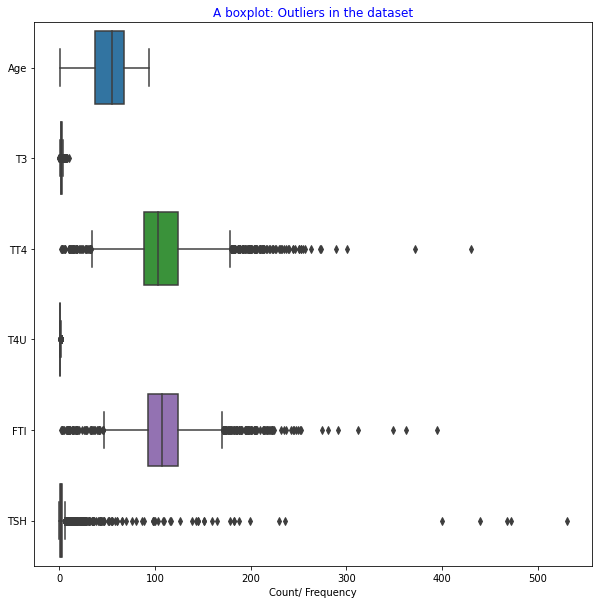

In [35]:
# check for outliers
col = data[['Age', 'T3', 'TT4', 'T4U', 'FTI', 'TSH']]
plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=col , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

# boxplot -> gives a good indication of how the values in the data are spread out
# minimum, q1, q2, q3, maximum
# outliers -> abnormal distance from random samples
# observation -> TT4, TSH and FTI has large number of outliers

In [36]:
from math import sqrt
# Drop Outliers
q3 = data.quantile(0.75)
q1 = data.quantile(0.25)
iqr = q3-q1
lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)

data = data[~( (data < lower_range)|(data > upper_range) ).any(axis=1)]

In [37]:
# size of the dataset
print("Shape before removing outliers: ", data.shape)
print("Shape after removing outliers: ", data.shape)

Shape before removing outliers:  (2179, 16)
Shape after removing outliers:  (2179, 16)


# Apply EDA

In [38]:
data.columns

Index(['Age', 'Gender', 'thyroxine', 'antithyroid medication', 'sick',
       'pregnant', 'thyroid surgery', 'lithium', 'goitre', 'tumor', 'TSH',
       'T3', 'TT4', 'T4U', 'FTI', 'target'],
      dtype='object')

Text(0.5, 1.0, 'Patients with Hypothyroid vs Not with Hypothyroid')

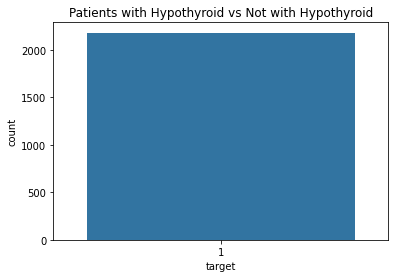

In [39]:
# countPlot for hypothayroid : positive or nagetive
sns.countplot(data['target'])
plt.title('Patients with Hypothyroid vs Not with Hypothyroid')
# observation -> imbalanced dataset: mostly patients have hypothyroid

Text(0.5, 1.0, 'Gender')

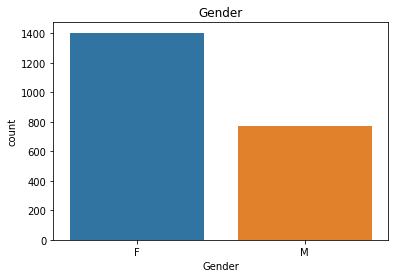

In [40]:
sns.countplot(data['Gender'])
plt.title("Gender")
# observation -> female patients are more then male patients
#             -> female patients around 1750
#             -> male patients between 750 to 1000

Text(0.5, 1.0, 'Patients with Goitre')

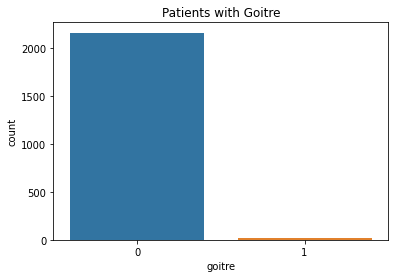

In [41]:
# Goitre: A swelling in the neck resulting from an enlarged thyroid gland
sns.countplot(data['goitre'])
plt.title("Patients with Goitre")
# observation -> mostly patients don't suffer with Goitre

Gender
F    1405
M     774
Name: target, dtype: int64


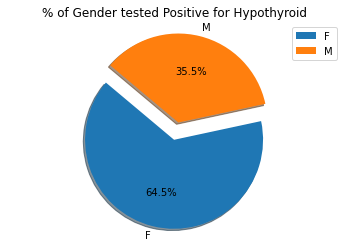

In [42]:
# Check on the percentage of gender that have tested positive for Hypothyroid
positive_patients = data[data['target'] == 1]
status = positive_patients['target'].groupby(positive_patients['Gender']).count()
print(status)
gender = ['F', 'M']
explode = (0.2, 0)

plt.pie(status, labels=gender, explode=explode, autopct= '%1.1f%%', shadow = True, startangle= 140)
plt.title('% of Gender tested Positive for Hypothyroid')
plt.axis('equal')
plt.legend()
plt.show()

# observation -> from hypothyroid patients female patients are more compare to male patients.

Gender
F    1405
M     774
Name: goitre, dtype: int64


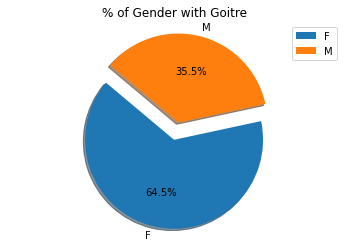

In [43]:
# Check on the percentage of gender with goitre
goitre = data['goitre'].groupby(data['Gender']).count()
gender = ['F', 'M']
print(goitre)
explode = (0.2, 0)

plt.pie(goitre, labels=gender, explode=explode, shadow = True, autopct= '%1.1f%%', startangle= 140)
plt.axis('equal')
plt.title('% of Gender with Goitre')
plt.legend()
plt.show()
# observation -> female patients are more with goitre compare to male patients

Text(0.5, 1.0, 'Patients on Thyroxine')

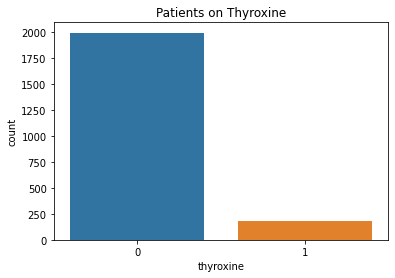

In [44]:
# Patients on Thyroxine
sns.countplot(data['thyroxine'])
plt.title("Patients on Thyroxine")

Text(0.5, 1.0, 'Patients on AntiThyroid Medication')

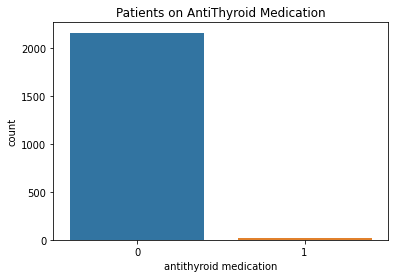

In [45]:
# Patients on AntiThyroxine
sns.countplot(data['antithyroid medication'])
plt.title("Patients on AntiThyroid Medication")
# observation -> mostly patients don't have antithyroid 

Text(0.5, 1.0, 'Patients had Thyroid Surgery')

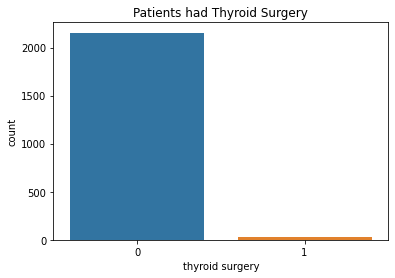

In [46]:
# Those patients that have had Thyroid Surgery
sns.countplot(data['thyroid surgery'])
plt.title("Patients had Thyroid Surgery")

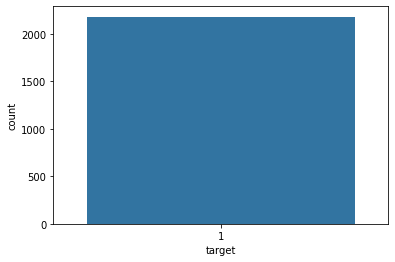

In [47]:
sns.countplot(data['target'])

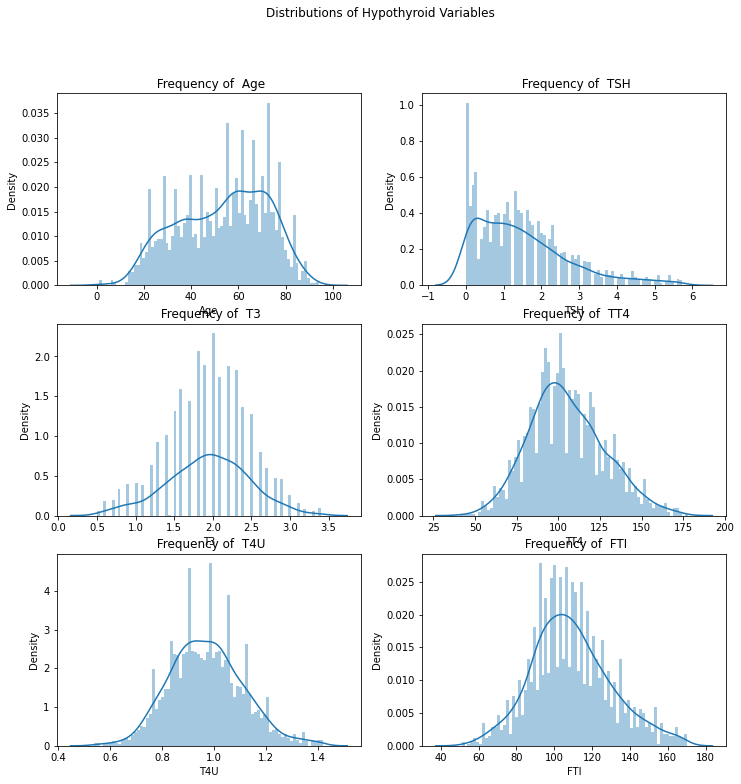

In [48]:
# Distribution of the Hypothyroid variables
# distplot -> to check variation in continues data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (12,12))
fig.suptitle('Distributions of Hypothyroid Variables')

num = data[['Age','TSH','T3','TT4','T4U','FTI']]

for ax, values, name in zip(axes.flatten(), num.values.T, num.columns):
    sns.distplot(values, ax=ax, bins=len(np.unique(num.values.T[1]))//2)
    ax.set(title=" \n Frequency of  {}".format(name), xlabel=name)

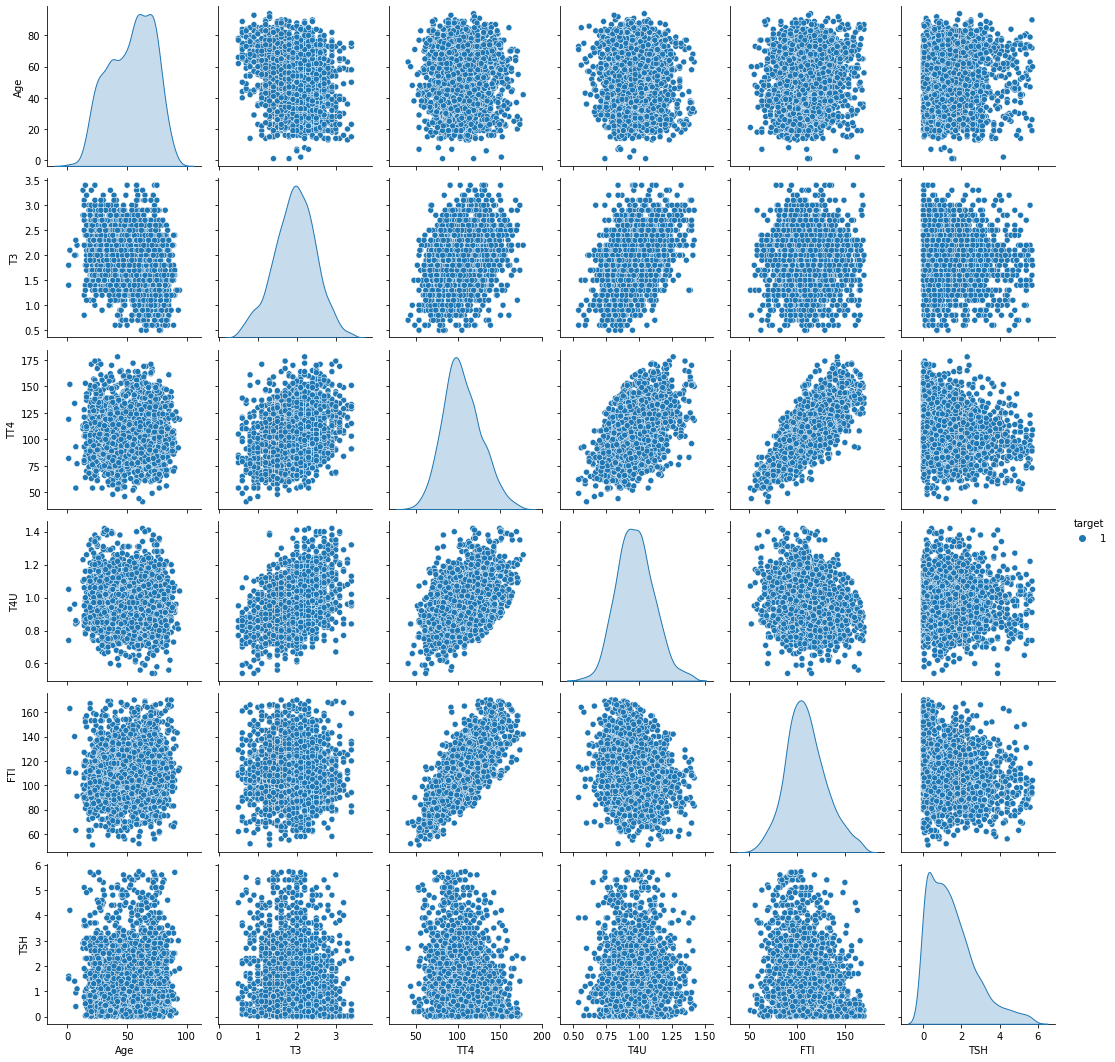

In [49]:
# check correlation between two variables using pairplot 
features = data[['Age', 'T3', 'TT4', 'T4U', 'FTI', 'TSH', 'target']]
sns.pairplot(features, hue='target')

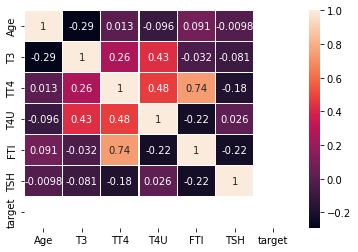

In [50]:
sns.heatmap(features.corr(), annot=True, linewidth=0.5)